In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

In [ ]:
ds_x, ds_y = load_boston(True)
print(ds_x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
un_ds_x = ds_x;
print(un_ds_x)
# transformer = Normalizer().fit(ds_x)
#ds_x = normalize(ds_x)
#print(ds_x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ds_x, ds_y, test_size=0.6, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

un_x_train, un_x_test, un_y_train, un_y_test = train_test_split(un_ds_x, ds_y, test_size=0.6, random_state=1)
un_x_train, un_x_val, un_y_train, un_y_val = train_test_split(un_x_train, un_y_train, test_size=0.25, random_state=1)

In [ ]:
n = ds_x.shape[1]
m = ds_x.shape[0]

In [ ]:
def GD(x, y):
  m = x.shape[0]
  reg = LinearRegression()
  acc_list = []
  reg.fit(x, y)
  y_predicted = reg.predict(x)
  acc = mean_squared_error(y, y_predicted)
  acc_list.append(acc)
  return acc_list

In [ ]:
def SGD(x, y, is_norm):
  m = x.shape[0]
  reg = SGDRegressor(max_iter=1000, tol=1e-3)
  acc_list = []
  for i in range(m):
    reg.partial_fit(x[i].reshape(1, -1), y[i].reshape(1, -1))
    acc = reg.score(x,y)
    acc_list.append(acc)
  return acc_list

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Normalized dataset

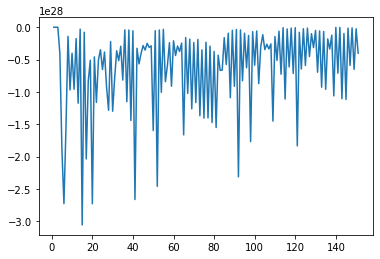

final accuracy:  -4.014118490777108e+27


In [ ]:
train_res = SGD(x_train, y_train, True)
plt.plot([(i+1) for i in range(x_train.shape[0])], train_res)
plt.show()
print('final accuracy: ', train_res[-1])

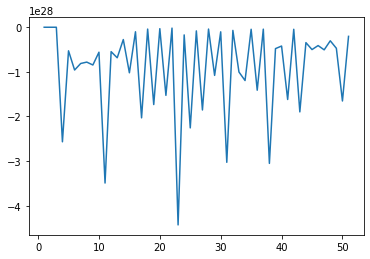

final accuracy:  -2.0432535918778216e+27


In [ ]:
val_res = SGD(x_val, y_val, True)
plt.plot([(i+1) for i in range(x_val.shape[0])], val_res)
plt.show()
print('final accuracy: ', val_res[-1])

### Not Normalized dataset

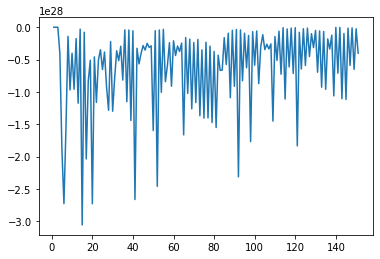

final accuracy:  -4.014118490777108e+27


In [ ]:
un_train_res = SGD(un_x_train, un_y_train, True)
plt.plot([(i+1) for i in range(un_x_train.shape[0])], un_train_res)
plt.show()
print('final accuracy: ', un_train_res[-1])

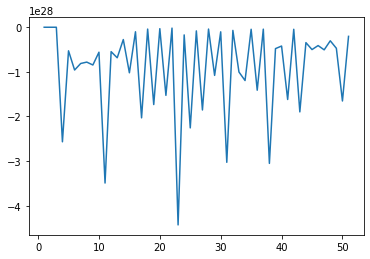

final accuracy:  -2.0432535918778216e+27


In [ ]:
un_test_res = SGD(un_x_val, un_y_val, True)
plt.plot([(i+1) for i in range(x_val.shape[0])], un_test_res)
plt.show()
print('final accuracy: ', un_test_res[-1])